In [1]:
import tensorflow as tf
from model import AutoEncoder

2023-04-08 21:53:32.277068: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Dense AutoEncoder

In [2]:
# load mnist dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# normalize data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# reshape data
x_train = x_train.reshape((len(x_train), x_train.shape[1] * x_train.shape[2]))
x_test = x_test.reshape((len(x_test), x_test.shape[1] * x_test.shape[2]))

# convert data to tensor
x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)

In [3]:
auto_encoder = AutoEncoder(x_train.shape[1])

auto_encoder.build(neurons=[128, 64], encoding_shape=49, activation="relu")

auto_encoder.compile(optimizer="adam", loss="mse")

auto_encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 encoder_0 (Dense)           (None, 128)               100480    
                                                                 
 encoder_1 (Dense)           (None, 64)                8256      
                                                                 
 bottlenck (Dense)           (None, 49)                3185      
                                                                 
 decoder_0 (Dense)           (None, 64)                3200      
                                                                 
 decoder_1 (Dense)           (None, 128)               8320      
                                                                 
 decode_output (Dense)       (None, 784)               1011

In [4]:
auto_encoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_test, x_test), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0250 - val_loss: 0.0171
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0162 - val_loss: 0.0147
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0144 - val_loss: 0.0133
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0135 - val_loss: 0.0128
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0129 - val_loss: 0.0124
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0125 - val_loss: 0.0120
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0121 - val_loss: 0.0116
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0118 - val_loss: 0.0115
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0117 - val_loss: 0.0115
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.011

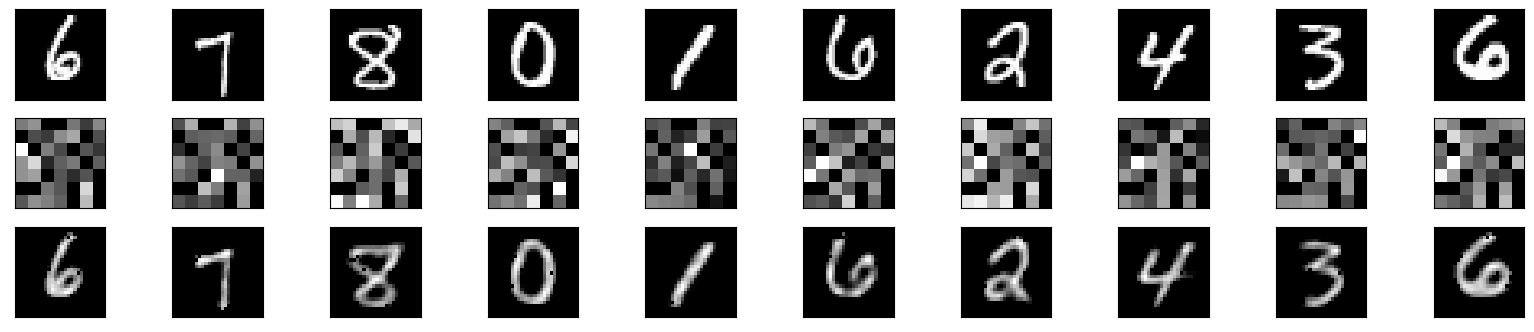

In [5]:
auto_encoder.evaluate(x_test, (28,28), (7,7), plot=True)

# Convolutional AutoEncoder

In [6]:
# load mnist dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# normalize data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# reshape data
x_train = x_train.reshape((len(x_train), x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((len(x_test), x_test.shape[1], x_test.shape[2], 1))

# convert data to tensor
x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)


In [7]:
auto_encoder = AutoEncoder(input_shape = x_train.shape[1:])

auto_encoder.build(filters=[32, 64], activation="relu")

auto_encoder.compile(optimizer="adam", loss="mse")

auto_encoder.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder_0_Conv1 (Conv2D)    (None, 28, 28, 32)        320       
                                                                 
 encoder_0_Conv2 (Conv2D)    (None, 28, 28, 32)        9248      
                                                                 
 encoder_0_MaxPool (MaxPooli  (None, 14, 14, 32)       0         
 ng2D)                                                           
                                                                 
 encoder_1_Conv1 (Conv2D)    (None, 14, 14, 64)        18496     
                                                                 
 encoder_1_Conv2 (Conv2D)    (None, 14, 14, 64)        36928     
                                                          

In [8]:
auto_encoder.fit(x_train, x_train, epochs=10, batch_size=64, validation_data=(x_test, x_test), verbose=1)

Epoch 1/10
938/938 [==============================] - 200s 212ms/step - loss: 0.0088 - val_loss: 0.0054
Epoch 2/10
938/938 [==============================] - 184s 196ms/step - loss: 0.0051 - val_loss: 0.0046
Epoch 3/10
938/938 [==============================] - 181s 193ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 4/10
938/938 [==============================] - 198s 211ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 5/10
938/938 [==============================] - 185s 198ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 6/10
938/938 [==============================] - 184s 196ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 7/10
938/938 [==============================] - 183s 195ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 8/10
938/938 [==============================] - 182s 195ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 9/10
938/938 [==============================] - 189s 202ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/10
938/938 [==============================] - 179s 191m

2023-04-08 22:25:47.225131: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1003520000 exceeds 10% of free system memory.
2023-04-08 22:25:48.112426: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1003520000 exceeds 10% of free system memory.
2023-04-08 22:25:49.383056: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1003520000 exceeds 10% of free system memory.
2023-04-08 22:25:49.780937: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1003520000 exceeds 10% of free system memory.
2023-04-08 22:25:50.373458: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1003520000 exceeds 10% of free system memory.


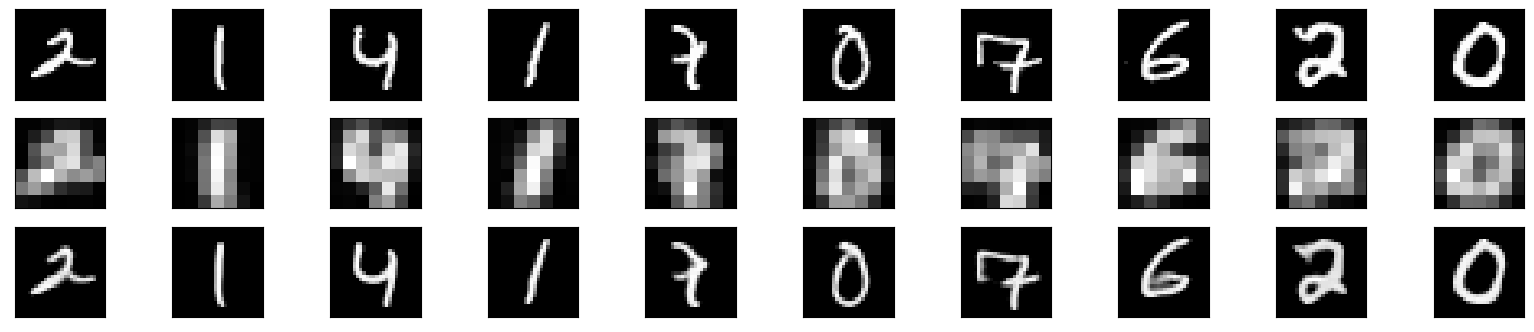

In [9]:
auto_encoder.evaluate(x_test, (28,28,1), (7,7,1), plot=True)